Importing The Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the uber dataset to the pandas dataframe
dataset = pd.read_csv('/content/UberDataset.csv')

In [3]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
dataset.shape

(1156, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


Data Preprocessing

In [6]:
# replace the not available cells by NOT in purpose column
dataset.fillna({'PURPOSE':'NOT'},inplace=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     1156 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [9]:
# changing the string value to datatime in both start date and end date columns
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],errors='coerce')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [11]:
# adding date and time (hour) columns by importing datetime module
from datetime import datetime


In [15]:
dataset['Date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['Time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

In [17]:
# add a column to show the category of time like morning , afternoon, evening, night
dataset['Day-Night'] = pd.cut(x=dataset['Time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [18]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [19]:
dataset.dropna(inplace=True)

In [20]:
dataset.shape

(413, 10)

Data Visualization

<Axes: xlabel='count', ylabel='PURPOSE'>

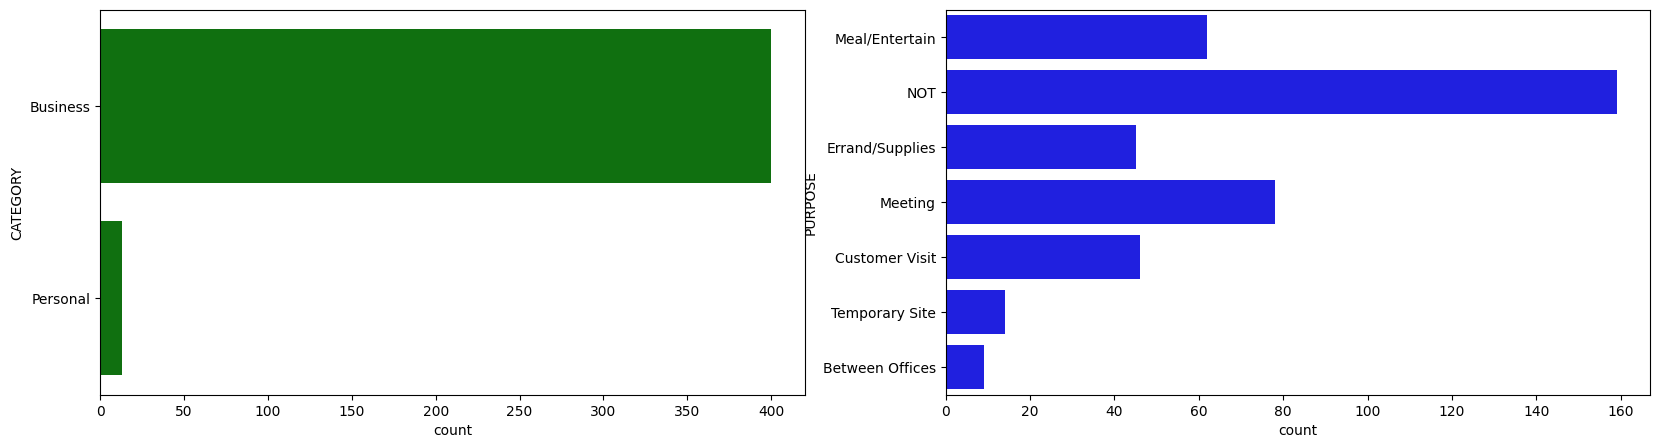

In [21]:
 plt.figure(figsize=(20,5))
 plt.subplot(1,2,1)
 sns.countplot(y=dataset['CATEGORY'],data=dataset,color='green')
 plt.subplot(1,2,2)
 sns.countplot(y=dataset['PURPOSE'],data=dataset,color='blue')

<Axes: xlabel='Day-Night', ylabel='count'>

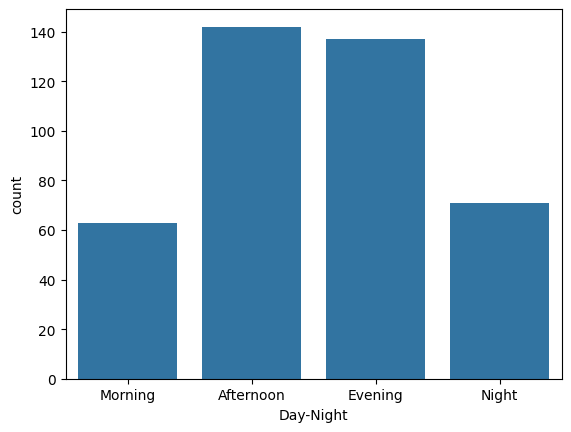

In [22]:
sns.countplot(x=dataset['Day-Night'])

In [28]:
dataset['Month'] = pd.DatetimeIndex(dataset['START_DATE']).month

month_label = {1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'Apr',5.0:'May',6.0:'Jun',7.0:'Jul',8.0:'Aug',9.0:'Sep',10.0:'Oct',11.0:'Nov',12.0:'Dec'}  # assigning all number months with string months name
dataset['Month'] = dataset['Month'].map(month_label) # replacing the numeric value by string of month column
mon = dataset['Month'].value_counts(sort=False)

In [29]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

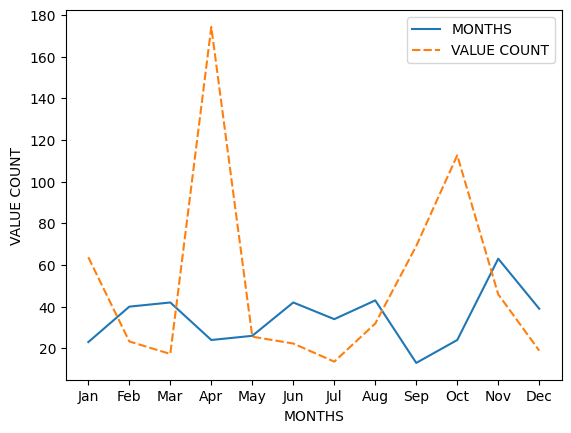

In [30]:
df = pd.DataFrame({
    "MONTHS": mon.values, # total count of each month
    "VALUE COUNT": dataset.groupby('Month',sort=False)['MILES'].max() # maximum miles value of each month
})

p=sns.lineplot(data=df)
p.set(xlabel="MONTHS",ylabel="VALUE COUNT")

In [32]:
dataset['Day'] = pd.DatetimeIndex(dataset['START_DATE']).weekday

day_label = {0.0:'Mon',1.0:'Tue',2.0:'Wed',3.0:'Thu',4.0:'Fri',5.0:'Sat',6.0:'Sun'}
dataset['Day']= dataset['Day'].map(day_label)

In [33]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Date,Time,Day-Night,Month,Day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wed


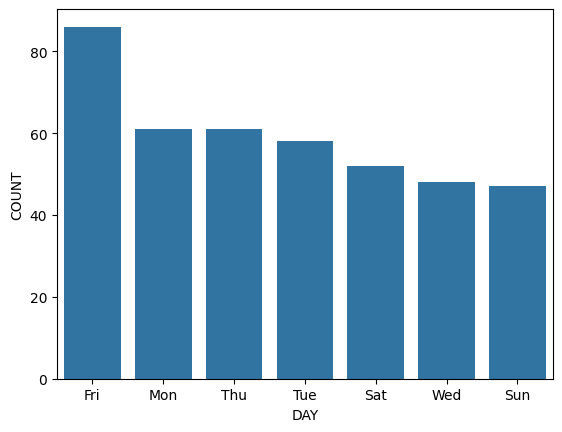

In [34]:
day_label= dataset['Day'].value_counts()
sns.barplot(x=day_label.index,y=day_label)
plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.show()

<Axes: ylabel='MILES'>

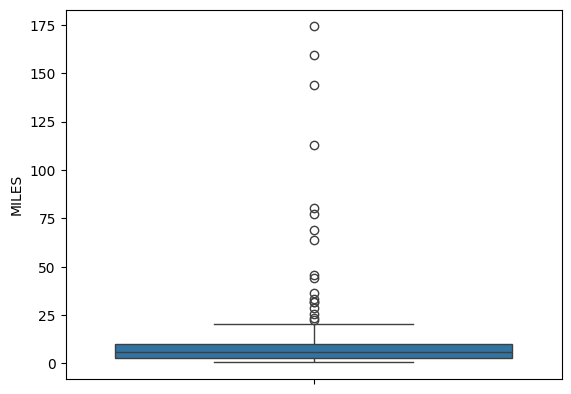

In [35]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

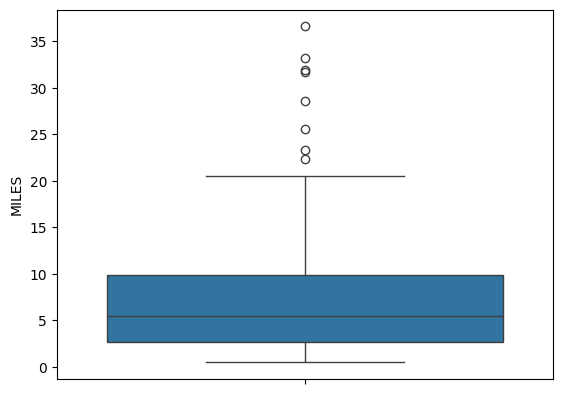

In [36]:
sns.boxplot(dataset[dataset['MILES']<40]['MILES'])